# Pymaceuticals Inc.
---

### Analysis

- From their boxplots, Capomulin and Ramicane appear to result in smaller final tumors compared to Infubinol and Ceftamin

- From the line graph of its tumor size over time, mouse i509's results appear to show the effect of treatment with Capumolin gradually decreasing the mouse's tumor size.

- Tumor size appears to be correlated with mouse weight, judging from both the 0.84 correlation and the visualization when plotted.
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_by_mouse = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
results_by_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
results_by_mouse['Mouse ID'].nunique()

249

In [83]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = results_by_mouse[results_by_mouse.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
results_by_mouse[results_by_mouse['Mouse ID'].isin(duplicate_mouse_ids)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Deduped_results = results_by_mouse[~results_by_mouse['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the cleaned DataFrame
Deduped_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [86]:
# Checking the number of mice in the clean DataFrame.
Deduped_results['Mouse ID'].nunique()

248

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Tumor_means = Deduped_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Tumor_medians = Deduped_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_variances = Deduped_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Tumor_StDevs = Deduped_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Tumor_sems = Deduped_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.concat([Tumor_means, Tumor_means, Tumor_variances, Tumor_StDevs, Tumor_sems], axis=1)

# mean, median, variance, standard deviation, and SEM of the tumor volume, renamed for better consistency and clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [88]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = Deduped_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

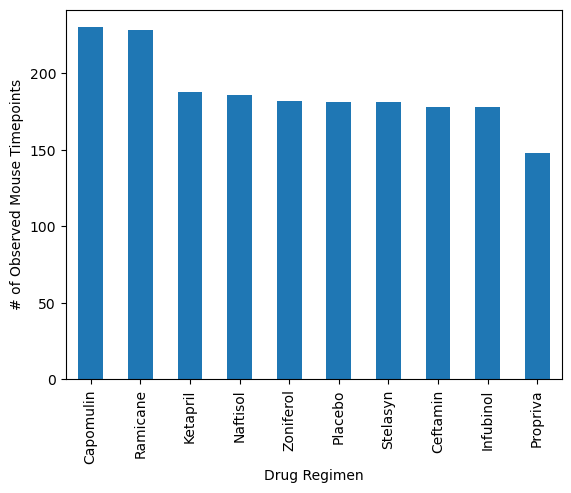

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Regimen_rowcount=Deduped_results.groupby('Drug Regimen')['Mouse ID'].count()
Regimen_rowcount.sort_values(ascending= False, inplace=True)
Regimen_rowcount

# Plot the bar chart
Regimen_rowcount.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
#plt.xticks(rotation=45)
plt.show()

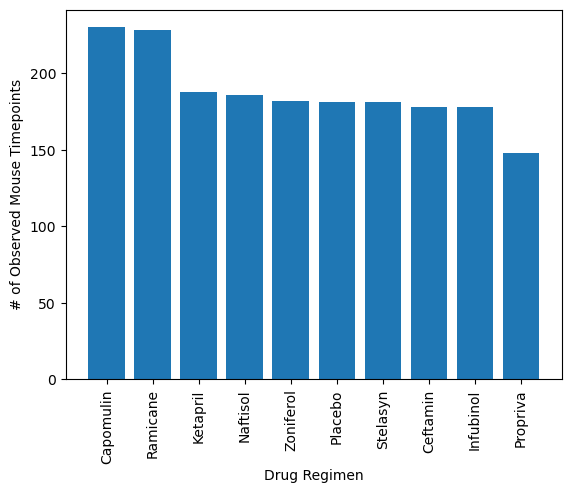

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Extract the index (drug regimens) and values (row counts) from the sorted Series
regimens = Regimen_rowcount.index
counts = Regimen_rowcount.values

# Create a bar chart using Matplotlib's PyPlot
plt.bar(regimens, counts)  # Create the bar chart with custom color
plt.xlabel('Drug Regimen')  # Set the x-axis label
plt.ylabel('# of Observed Mouse Timepoints')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

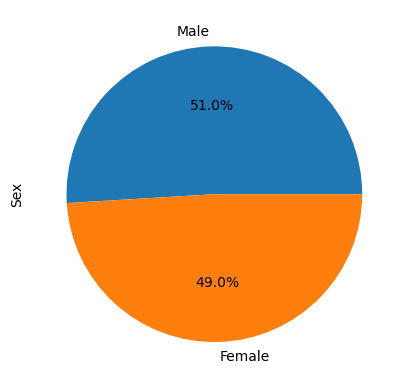

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Genders=Deduped_results['Sex'].value_counts()

# Plot the pie chart
Genders.plot(kind='pie', autopct='%1.1f%%', labels=['Male','Female'],ylabel='Sex')
plt.show()

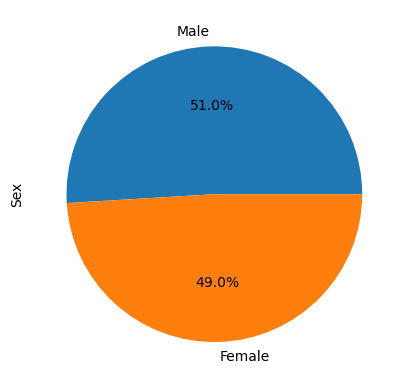

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Genders, labels=Genders.index, autopct='%1.1f%%')
plt.ylabel(ylabel='Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Group by 'Mouse ID' to find the final time point for each mouse
final_timepoints = Deduped_results.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(final_timepoints, Deduped_results, on=['Mouse ID', 'Timepoint'], how='left')


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
focus_regs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
regimen_data = []
plotting_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in focus_regs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

    # add subset 
    plotting_data.append(regimen_data)
    #plotting_data_subset = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == regimen,'Tumor Volume (mm3)']
    #plotting_data_subset = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == regimen, ['Drug Regimen', 'Tumor Volume (mm3)']]
    
    # Calculate quartiles and determine potential outliers for the final tumor volume
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]    
    inter_qtr_rng = upper_q - lower_q
    lower_bound = lower_q - 1.5 * inter_qtr_rng
    upper_bound = upper_q + 1.5 * inter_qtr_rng
    # Determine outliers using upper and lower bounds
    potential_outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s Potential outliers: {potential_outliers}")


Capomulin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


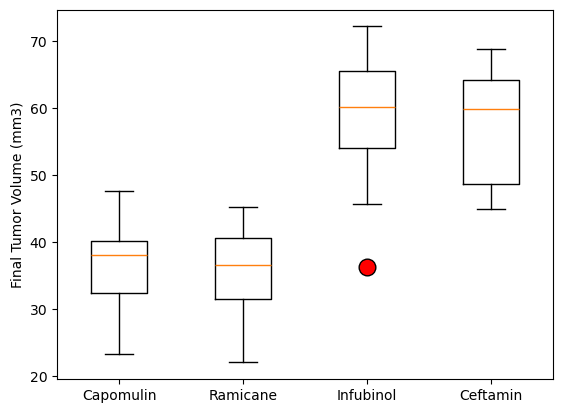

In [126]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(plotting_data, labels=focus_regs, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

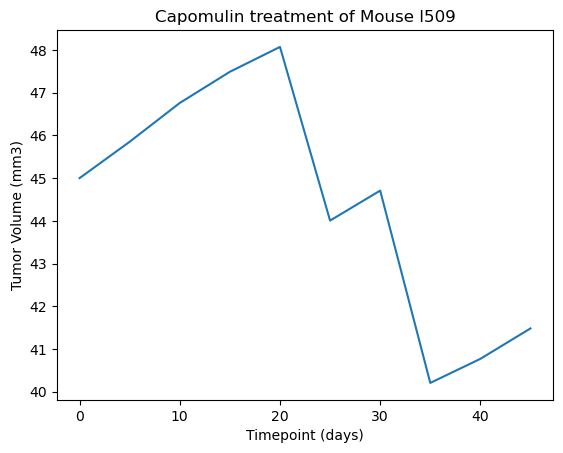

In [127]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_data = Deduped_results[(Deduped_results['Drug Regimen'] == 'Capomulin') & (Deduped_results['Mouse ID'] == mouse_id)]

# Create a line plot for tumor volume vs. time point
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], label=f'Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of Mouse {mouse_id}')
plt.show()

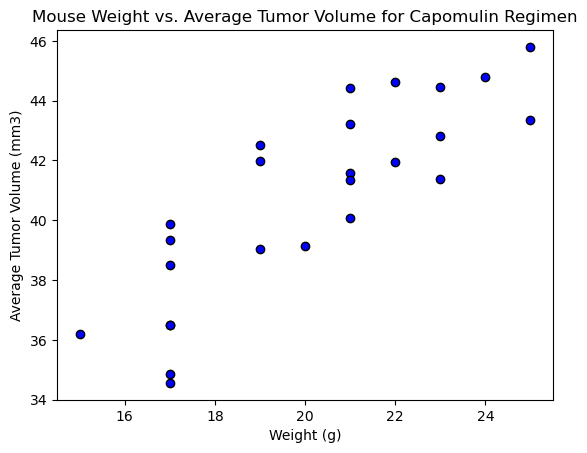

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = Deduped_results[Deduped_results['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between weight and tumor size is 0.84


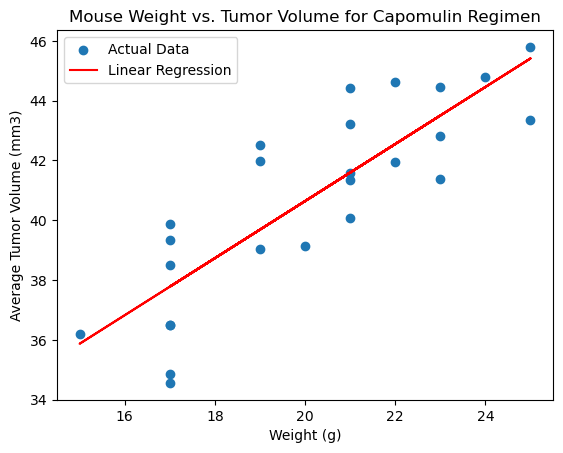

In [121]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Convert Pandas Series to NumPy arrays
mouse_weight_array = np.array(mouse_weight)
avg_tumor_volume_array = np.array(avg_tumor_volume)

# Calculate Pearson's correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight_array, avg_tumor_volume_array)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient,2)}")

# Fit a linear regression model
model = LinearRegression()

# Reshape the NumPy arrays
model.fit(mouse_weight_array.reshape(-1, 1), avg_tumor_volume_array)
intercept = model.intercept_
slope = model.coef_[0]

# Generate predictions using the linear regression model
predicted_tumor_volume = model.predict(mouse_weight_array.reshape(-1, 1))

# Plot the scatter plot and overlay the linear regression line
plt.scatter(mouse_weight_array, avg_tumor_volume_array, label='Actual Data')
plt.plot(mouse_weight_array, predicted_tumor_volume, color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume for Capomulin Regimen')
plt.legend()
plt.show()
